# `Loading Required Packages and Data`

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from time import time
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

# `Data Splitting`

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### `shapes of training and testing data`

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

*** 
***`Conclusion:`*** ***We have 60000 images for training which were 28*28, and we have 10000 images for testing purpose***
***

# `Dataset Display`

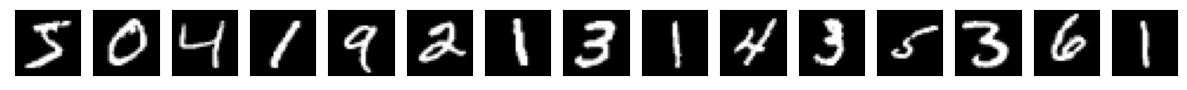

In [7]:
# number of digit to display
n = 15

# Create a figure to display the image
plt.figure(figsize=(15,4))

# Loop through the first image to n
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2,n,i+1)
    
    # Display the orignal image
    plt.imshow(x_train[i].reshape(28,28))
    
    # Select Colormap to grayscale
    plt.gray()
    
    # Hide x_axis and y_axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# Show the figure within the image
plt.show()

# Close the figure
plt.close()

*** 
***`Conclusion:`*** ***We have 7000 images of human written numbers***
***

# `Flattening the Images`

In [8]:
# Print the shape of orignal data and labels
print(f'Previous x_train shape {x_train.shape} and previous y_train shape {y_train.shape}')

Previous x_train shape (60000, 28, 28) and previous y_train shape (60000,)


#### `Reshape Training And Testing Data To Flat Format`

In [9]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

#### `Print New Shape Of Data`

In [10]:
# Print the shape of orignal data and labels
print(f'Update x_train shape {x_train.shape} and Updated y_train shape {y_train.shape}')

Update x_train shape (60000, 784) and Updated y_train shape (60000,)


# `Min-Max Scalling`

In [11]:
# Convert the data type of the images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the pixel values to a range b/w 0 and 1
x_test /= 255
x_train /= 255

# `Processing The Target Variable`

***
***`Problem:`*** ***We have images of number b/w 0-9 mean we have 10 target variables to predict. At a time either an image is of number 0 or 1 or 2 or any other. So we need to find a method that we convert these 10 classes into 2 `{0 or 1}`. So we chose `one-hot encoded format`***
***

In [12]:
# Number of Classes
classes = 10

# Convert the label to one-hot encoded format
y_train = to_categorical(y_train,classes)
y_test = to_categorical(y_test,classes)

# Print the Shape of PreProcessd Training Data and Labels
print(f'PreProcessed x_train shape {x_train.shape} and PreProcessed y_train shape {y_train.shape}')

del classes

PreProcessed x_train shape (60000, 784) and PreProcessed y_train shape (60000, 10)


# `Setting up Hyper Parameters`

In [13]:
# Define the input size of each data sample
input_size = 784

# Specify the number of data samples to process in each batch
batch_size = 180

# Define The Number Of Neuron In First Hidden Layer
hidden1 = 450

# Define The Number Of Neuron In Second Hidden Layer
hidden2 = 70

# Define The Number Of Neuron In Third Hidden Layer
hidden3 = 20

# Define Total Number Of Classes In Data Set
classes = 10

# Set The Number Of Complete Passes Through The DataSet During Training
epochs = 10

# `Building The Fully Connected Neural Network(FCN) Model`

In [14]:
# Create a Sequential model, which allow us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using RELu Activation function
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

# Add the second hidden layer with 'hidden2' neurons, using RELu Activation function
model.add(Dense(hidden2, activation='relu'))

# Add the third hidden layer with 'hidden3' neurons, using RELu Activation function
model.add(Dense(hidden3, activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
model.add(Dense(classes, activation='softmax'))

# Compilation
model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'], optimizer='sgd')

# Display the Summry of Model Acrchitecture, Showing Layers and Parameters Count
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 450)               353250    
                                                                 
 dense_1 (Dense)             (None, 70)                31570     
                                                                 
 dense_2 (Dense)             (None, 20)                1420      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 386,450
Trainable params: 386,450
Non-trainable params: 0
_________________________________________________________________


# `Training The Model`

In [15]:
# Record Current Time To Measure Training Time
tic = time()

# Fit The Model On The Training Data
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1) # Verbose is for showing training procedure

# Record time after model training
toc = time()

Epoch 1/10
334/334 [==============================] - 3s 7ms/step - loss: 1.6437 - accuracy: 0.4986
Epoch 2/10
334/334 [==============================] - 2s 7ms/step - loss: 0.6151 - accuracy: 0.8486
Epoch 3/10
334/334 [==============================] - 2s 7ms/step - loss: 0.4132 - accuracy: 0.8874
Epoch 4/10
334/334 [==============================] - 3s 8ms/step - loss: 0.3449 - accuracy: 0.9039
Epoch 5/10
334/334 [==============================] - 3s 9ms/step - loss: 0.3063 - accuracy: 0.9143
Epoch 6/10
334/334 [==============================] - 3s 8ms/step - loss: 0.2792 - accuracy: 0.9212
Epoch 7/10
334/334 [==============================] - 2s 7ms/step - loss: 0.2586 - accuracy: 0.9280
Epoch 8/10
334/334 [==============================] - 2s 7ms/step - loss: 0.2414 - accuracy: 0.9329
Epoch 9/10
334/334 [==============================] - 2s 7ms/step - loss: 0.2268 - accuracy: 0.9370
Epoch 10/10
334/334 [==============================] - 2s 7ms/step - loss: 0.2138 - accuracy: 0.9403

***`Time Taken To Train a Model`***

In [16]:
print(f'Model Training Took {toc-tic:.2f} seconds')

Model Training Took 24.99 seconds


# Testing The Model

In [17]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict Propabilities for the test size
y_predict_prob = model.predict(x_test,verbose=0)
y_pred = np.where(y_predict_prob > 0.5,1,0)

# Calculate and predict test accuracy using predicted and true label
test_accuracy = accuracy_score(y_pred,y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

Test Accuracy: 92.76%


### `Visculize`

In [18]:
# Define a mask for selecting a range of indices
mask = range(20, 50)

# Select a range of 20 sample from test set
x_valid = x_test[0:20]
actual_labels = y_test[0:20]

# Predict probabilty for selected validation sammple
y_pred_prob_validation = model.predict(x_valid)
y_valid_pred = np.where(y_pred_prob_validation > 0.5, 1, 0)

1/1 [==============================] - 0s 37ms/step


### `Plot`

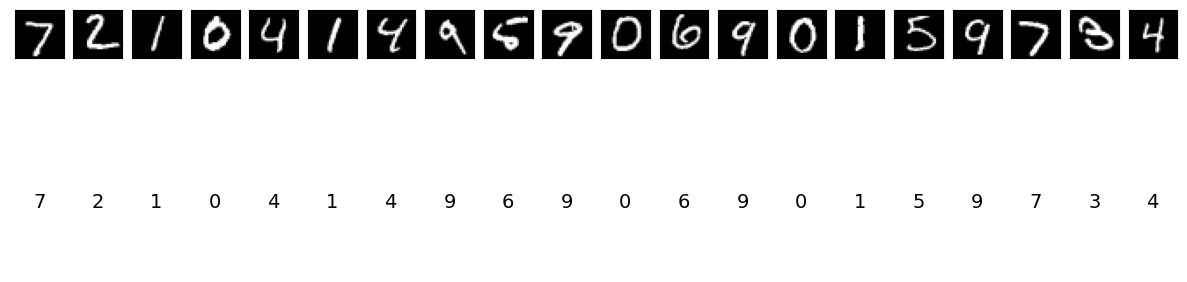

In [19]:
n = len(x_valid)

# Create a figure to display the image
plt.figure(figsize=(15,4))

# Loop through the first image to n
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2,n,i+1)
    
    # Display the orignal image
    plt.imshow(x_valid[i].reshape(28,28))
    
    # Select Colormap to grayscale
    plt.gray()
    
    # Hide x_axis and y_axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display Predicted Digit
    predicted_digit = np.argmax(y_valid_pred[i])
    ax = plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=14, ha='center', va='center')
    plt.axis('off')
# Show the figure within the image
plt.show()

# Close the figure
plt.close()